In [1]:
import librosa
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import pydub
from pydub import AudioSegment

In [3]:
audio = AudioSegment.from_file("naud.m4a")
audio.export("audio2.wav", format="wav")
print("Audio exported successfully to 'audio2.wav'")

Audio exported successfully to 'audio2.wav'


In [4]:
y_0, sr_0 = librosa.load('audio2.wav', sr=None)

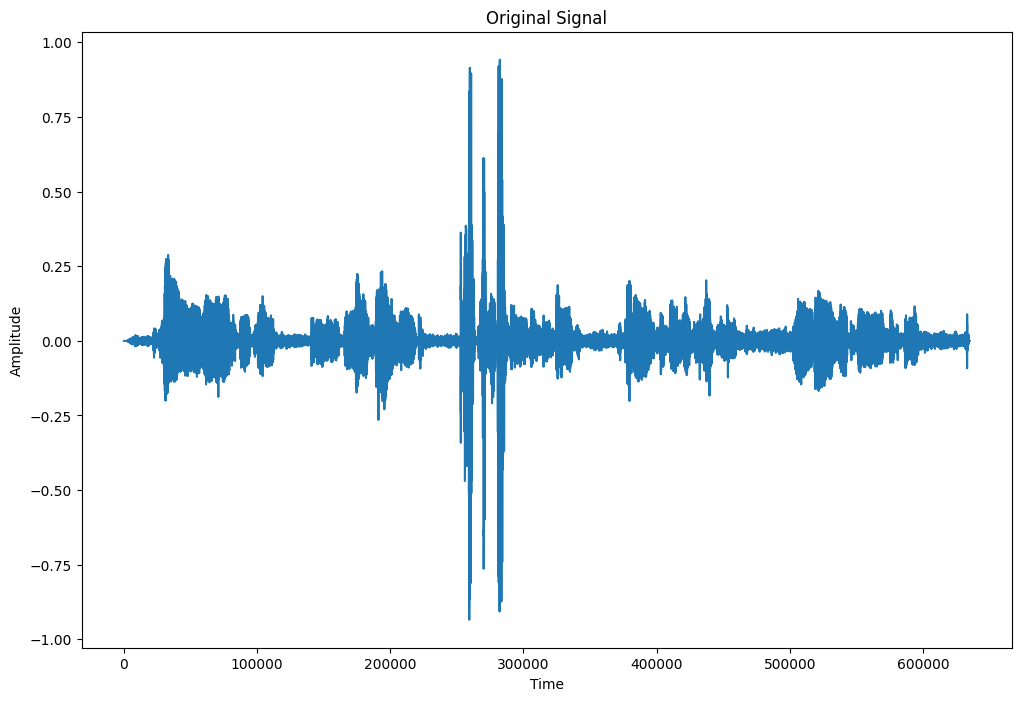

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(y_0)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()